In [1]:
%pip install scikit-learn

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 10000
)

len(X_train), len(X_test), len(y_train), len(y_test)

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5c/e9/ee572691a3fb05555bcde41826faad29ae4bc1fb07982e7f53d54a176879/scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy>=1.17.3 from https://files.pythonhosted.org/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/14/f2/10fa23f0a6b9b2439c01579ae4a9b1849d4822e972515c8f92584bfda5e9/scipy-1.11.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 540.3 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/job

/home/xamanek/.virtualenvs/DLops/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(60000, 10000, 60000, 10000)

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c2/da/a5622266952ab05dc3995d77689cba600e49ea9d6c51d469c077695cb719/matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/aa/55/02c6d24804592b862b38a85c9b3283edc245081390a520ccd11697b6b24f/contourpy-1.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/87/61/f50ab3237b0cbf2b0be12274227f912d30f94e2b93fb8bae92c91107eee8/fonttools-4.42.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 216.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 203.3 kB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pillow>=6.2.0 from https://f

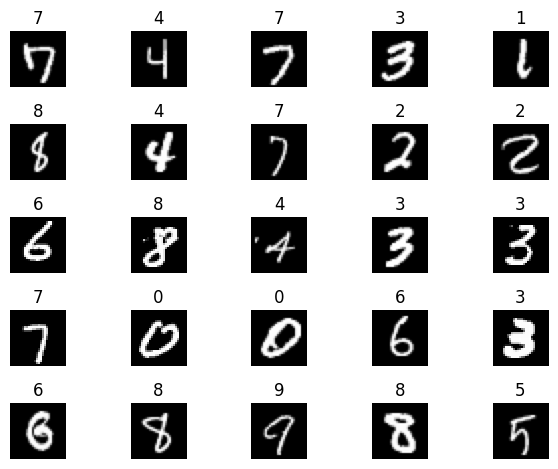

In [2]:
%pip install matplotlib
import matplotlib.pyplot as plt
import random

fig = plt.figure( dpi = 100 )
for ix in range ( 25 ):
    ax = plt.subplot( 5, 5, ix + 1 )
    i = random.randint( 0, len(X_train) - 1 )
    img, label = X_train[i], y_train[i]
    ax.imshow( img.reshape( 28, 28 ), cmap = 'gray' )
    ax.set_title( label )
    ax.axis( 'off' )
plt.tight_layout()
plt.show()

In [3]:
import numpy as np

X_train_3 = X_train[ y_train == '3' ][:100]
X_train_no_3 = X_train[ y_train != '3' ][:100]

len(X_train_3), len(X_train_no_3)

(100, 100)

In [4]:
def plot_samples(X):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot( 5, 5, ix + 1 )
        i = random.randint( 0, len(X)-1 )
        img = X[i]
        ax.imshow( img.reshape( 28, 28), cmap = 'gray' )
        ax.axis( 'off' )
    plt.tight_layout()
    plt.show()

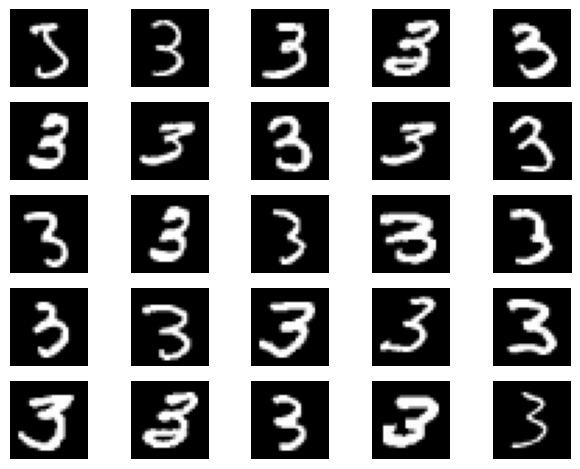

In [5]:
plot_samples(X_train_3)

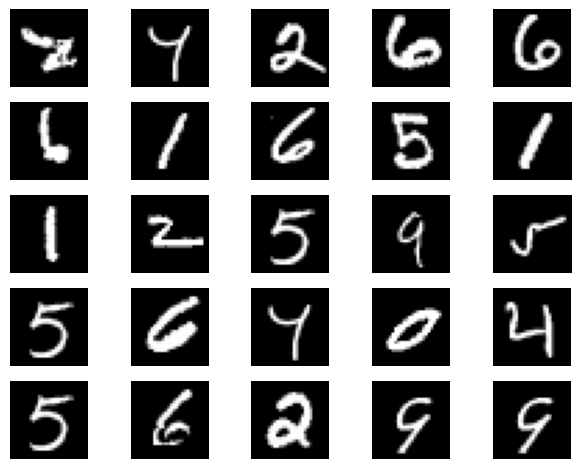

In [6]:
plot_samples(X_train_no_3)

In [7]:
%pip install scikit-image
import os
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path('dataset')

def generate_dataset(X_train_3, X_train_no_3, test_size):
    shutil.rmtree(path)
    #os.makedirs(path, exist_ok=True)
    isExist = os.path.exists(path)
    #print(isExist)
    if not isExist:
        os.makedirs(path)

    splits = ['train', 'test']
    for split in splits:
        os.makedirs( path / split, exist_ok = True )
        os.makedirs( path / split / '3', exist_ok = True )
        os.makedirs( path / split / 'no3', exist_ok = True )
        if split == 'train':
            X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
        else:
            X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
        for x1, x2 in zip(X1, X2):
            #imsave( path / split / '3' / f'{random.randint( 0, 99999):05d}.png', x1.reshape( 28, 28 ).astype( 'uint8' ) )
            #imsave( path / split / 'no_3' / f'{random.randint(0, 99999):05d}.png', x2.reshape( 28, 28 ).astype( 'uint8' ) )
            imsave(path / split / '3' / f'{random.randint(0, 99999):05d}.png', x1.reshape(28,28).astype('uint8'))
            imsave(path / split / 'no3' / f'{random.randint(0, 99999):05d}.png', x2.reshape(28,28).astype('uint8'))


  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/70/a9/a9f63dde69ac5a4451d8a0ebdde95824ec31aafcae1c77658a9058e27bb7/scikit_image-0.21.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 968.0 kB/s eta 0:00:0000:0100:01
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/c7/b0/7b6c35b8636ed773325cdb6f5ac3cd36afba63d99e20ed59c521cf5018b4/imageio-2.31.1-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/2d/e5/cc8a8ca43685006bb3ca56fab60707f3f74700844b18634db0b1e8b4b93f/tifffile-2023.7.18-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 872.1 kB/s eta 0:00:0000:0100:01
  Obtaining dependency information for lazy_loader>=0.2 from https://files.pythonhosted.org/packages/a1/c3/65b3814e155836acacf720e5be3b57571303466

In [9]:
generate_dataset( X_train_3, X_train_no_3, 20 )

In [10]:
from glob import glob

def get_paths():
    train_3 = glob( str( path / 'train' / '3' / '*.png' ) )
    train_no3 = glob( str( path / 'train' / 'no3' / '*.png' ) )
    test_3 = glob( str( path / 'test' / '3' / '*.png' ) )
    test_no3 = glob( str( path / 'test' / 'no3' / '*.png' ) )
    return train_3, train_no3, test_3, test_no3

train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(80, 80, 20, 20)

In [11]:
from skimage.io import imread

def plot_images(paths):
    #fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot( 5, 5, ix + 1 )
        i = random.randint( 0, len(paths) - 1 )
        img = imread( paths[i] )
        ax.imshow( img, cmap = 'gray' )
        ax.axis( 'off' )

    plt.tight_layout()
    plt.show()

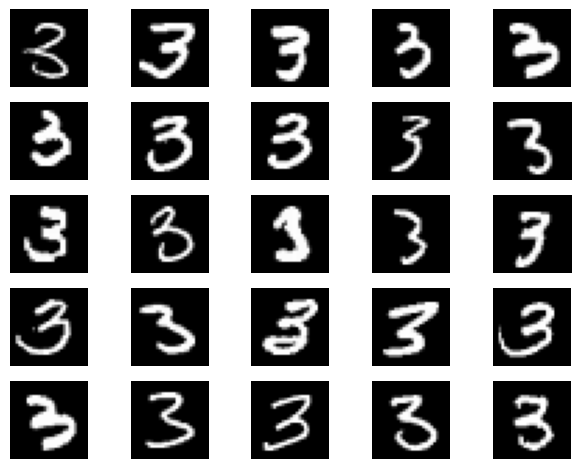

In [12]:
plot_images(train_3)

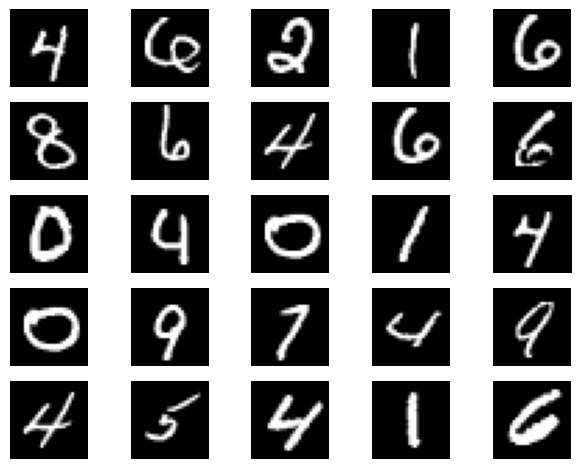

In [13]:
plot_images(train_no3)

In [13]:
X_train_3 = X_train[y_train == '3'][:200]
X_train_no_3 = X_train[y_train != '3'][:200]

len(X_train_3), len(X_train_no_3)

(200, 200)

In [14]:
generate_dataset(X_train_3, X_train_no_3, 40)

In [15]:
train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(160, 160, 40, 40)

Nueva version 2 con 400 archivos

In [17]:
X_train_3 = X_train[y_train == '3'][:400]
X_train_no_3 = X_train[y_train != '3'][:400]

len(X_train_3), len(X_train_no_3)

(400, 400)

In [18]:
generate_dataset(X_train_3, X_train_no_3, 80)

In [19]:
train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(320, 320, 80, 80)

Revisar la version 1 con 200 registros y split de 160 / 40

In [20]:
train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(160, 160, 40, 40)

Volver a la version V2 con 400 registros y split de 320 / 80

In [21]:
train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(320, 320, 80, 80)